## Logistic Regression Model 

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data_df = pd.read_csv('data_process_cum.csv')

In [3]:
data_df.head(3)

,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,...,Reexp2_cum,Avoid1_cum,Avoid2_cum,NACM1_cum,NACM2_cum,AAR1_cum,AAR2_cum,Sleep_cum,Pain_cum,Threshold
0,2.0,2.0,2.50,3.00,3.000,2.00,0.00,0.0,0.50,0.50,...,2.500,3.00,3.0000,2.000,0.000,0.0,0.500,0.50,5.500,1
1,5.5,1.0,1.25,0.75,1.125,1.50,0.75,0.0,0.00,0.75,...,3.750,3.75,4.1250,3.500,0.750,0.0,0.500,1.25,9.500,1
2,9.5,0.0,0.50,0.75,1.000,0.75,0.00,0.0,0.25,1.25,...,2.125,2.25,2.5625,2.125,0.375,0.0,0.375,1.25,6.125,1


In [4]:
data_df.columns

Index(['Days.Since', 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2',
       'AAR1', 'AAR2', 'Sleep', 'Pain', 'Reexp1_cum', 'Reexp2_cum',
       'Avoid1_cum', 'Avoid2_cum', 'NACM1_cum', 'NACM2_cum', 'AAR1_cum',
       'AAR2_cum', 'Sleep_cum', 'Pain_cum', 'Threshold'],
      dtype='object')

Split the data into training set and testing set using train_test_split

In [5]:
dataset = data_df.as_matrix()
X = dataset[:,0:21]

#last column is the target
y = dataset[:,21:22]

### Selected input features

In [6]:
# standardize the data attributes
standardized_X = preprocessing.scale(X)


### Target variable 
Threshold

In [7]:
#Train-Test split (70-30%)
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y.ravel(), test_size=0.30, random_state= 4)

Train and fit a logistic regression model on the training set.

In [8]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now predict values for the testing data.

In [9]:
predictions = logmodel.predict(X_test)

Create a classification report for the model.

In [10]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.82      0.82       193
        1.0       0.77      0.77      0.77       151

avg / total       0.80      0.80      0.80       344



In [11]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predictions))

0.8023255813953488


### Precision Recall curve

 Recall is a performance measure of the whole positive part of a dataset, whereas precision is a performance measure of positive predictions.

In [12]:
y_score = logmodel.decision_function(X_test)

In [13]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {:03.2f}'.format(average_precision))

Average precision-recall score: 0.80


Text(0.5,1,'2-class Precision-Recall curve: AP=0.80')

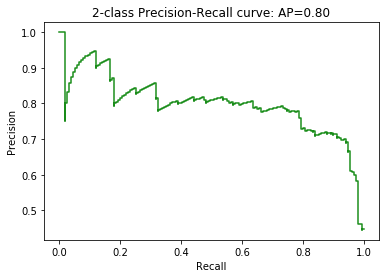

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='g', alpha=0.9,where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### Cross validation in logistic regression

In [15]:
# evaluate the model using 10-fold cross-validation
cv_scores = cross_val_score(LogisticRegression(), standardized_X, y.ravel(), scoring='accuracy', cv=10)
print(cv_scores)

print("The Cross validation score on Logistic Regression:",cv_scores.mean())


[0.64347826 0.71304348 0.66086957 0.86956522 0.74561404 0.79824561
 0.62280702 0.51754386 0.74561404 0.48245614]
The Cross validation score on Logistic Regression: 0.6799237223493517
